### 1. Reading image data
This script uses [Middlebury Computer Vision dataset](http://vision.middlebury.edu/mview/data/) with a render of "Temple of the Dioskouroi" in Agrigento, Sicily.  
It contains 312 views sampled on a hemisphere. There are also files with camera parameters and angles for each image.

In [1]:
import os

datasetDirectory = "data/temple/"
imagesCount = len([i for i in os.listdir(datasetDirectory) if i.endswith(".png")])
print(f"Found {imagesCount} images in {datasetDirectory} dataset.")

Found 312 images in data/temple/ dataset.


In [2]:
import cv2
frame1 = cv2.imread(os.path.join(datasetDirectory, "temple{:04d}.png".format(1)))
frame2 = cv2.imread(os.path.join(datasetDirectory, "temple{:04d}.png".format(2)))
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

### 2. Feature extraction
Extracting features from both images using ORB (oriented BRIEF) keypoint detector and descriptor extractor.

In [3]:
extractorORB = cv2.ORB_create()
keypoints1, descriptors1 = extractorORB.detectAndCompute(frame1, mask=None)
keypoints2, descriptors2 = extractorORB.detectAndCompute(frame2, mask=None)

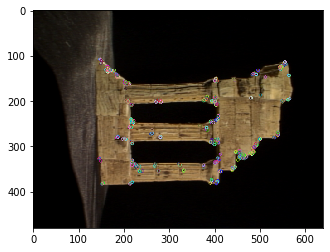

In [7]:
import matplotlib.pyplot as plt
keypointsImage = cv2.drawKeypoints(frame1, keypoints1, None)
plt.imshow(keypointsImage)
plt.show()

### 3. Feature matching


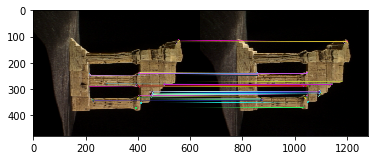

In [5]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = matcher.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)[:50]

matchesImage = cv2.drawMatches(frame1, keypoints1, frame2, keypoints2, matches, None, flags=2)
plt.imshow(matchesImage)
plt.show()

### 4. Reading camera parameters

In [29]:
import numpy as np

def readCameraParameters(datasetDirectory, frameIdx):
    with open(os.path.join(datasetDirectory, "temple_par.txt")) as f:
        params = f.readlines()[frameIdx].rstrip()
        params = list(map(float, params.split(" ")[1:]))
        K = np.zeros((3, 3))
        R = np.zeros((3, 3)) 
        t = np.zeros((1, 3))
        K[0,0], K[0,1], K[0,2], K[1,0], K[1,1], K[1,2], K[2,0], K[2,1], K[2,2] = params[0:9]
        R[0,0], R[0,1], R[0,2], R[1,0], R[1,1], R[1,2], R[2,0], R[2,1], R[2,2] = params[9:18]
        t[0,0], t[0,1], t[0,2] = params[18:]
#         _, K, R, t = map(float, frameLine.split(", ")[1:])
        return K, R, t
    
K, R, t = readCameraParameters(datasetDirectory, 1)
print("Camera intrinsic matrix K =\n", K)
print("Rotation matrix R =\n", R)
print("Translation vector t =\n", t)

Camera intrinsic matrix K =
 [[1.5204e+03 0.0000e+00 3.0232e+02]
 [0.0000e+00 1.5259e+03 2.4687e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00]]
Rotation matrix R =
 [[ 0.01551372  0.99884344 -0.04550951]
 [ 0.99922239 -0.0171375  -0.03550953]
 [-0.03624838 -0.04492323 -0.99833259]]
Translation vector t =
 [[-0.05998548  0.00400788  0.57088647]]
